# CLIMATE 405: Machine Learning for Earth and Environmental Sciences; FALL 2024
## Mohammed Ombadi (ombadi@umich.edu)

# Lecture 7 (Monday, 09/23/2024)
# Topics covered in this lecture:
- The simple linear regression model (estimation and interpretation of parameters, assumptions).
- Multiple linear regression.
- Goodness of fit.
- In-class excercise. 

## Import libraries

In [1]:
# Import libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.integrate import odeint
from IPython.display import Image
from statistics import mode
from scipy.stats import pearsonr, spearmanr
from sklearn.feature_selection import mutual_info_regression
import statsmodels.api as sm
import pingouin as pg

# Suppress warnings
warnings.filterwarnings('ignore')

# Set number of decimals for np print options
np.set_printoptions(precision=3)

# Set the current working directory
os.chdir(sys.path[0])

## <center>Simple Linear Regression</center>

Simple linear regression is a statistical model that estimates the linear relationship between the dependent variable (**_y_**) and one explanatory variable (**_x_**).

The formula of a simple linear regression model is: 
<span style="font-size: 24px;"> $ y = \beta_{0} + \beta_{1} * x + \epsilon $ <span>

The most common approach of fitting linear regression models is using least squares. That is, the regression line minimizes the sum of the squares of the residuals (the difference between observed values and the fitted values by the model).
- In this case, Least squares will require minimizing the follwoing: <span style="font-size: 24px;"> $\sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 * x_i))^2$ <span>

### Let's look at an example of building a simple linear regression model:

Let's use the dataset "partial_correlation_data_annual.csv". We have used this dataset previously to explore the application of partial correlation. The dataset consists of annual observations for three variables: "P": Precipitation, "E": Evapotranspiration and "S": Streamflow for a watershed in Southern California for the time period 1980 - 2021 

In [122]:
df = pd.read_csv('partial_correlation_data_annual.csv')
df.head()

,year,P,S,E
0,1980,1003,3276,1260
1,1981,346,170,1395
2,1982,944,860,1208
3,1983,1111,2500,1190
4,1984,454,189,1313


We would like to estimate annual streamflow (**S**) based on precipitation observations (**P**):

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
y = df['S'].values.reshape(-1,1)
x = df['P'].values.reshape(-1,1)

# Fit the model to the data (estimate parameters)
model = LinearRegression()
model.fit(x, y)

# Get the model estimated y
y_est = model.predict(x)

Plot the observations and estimated values:

In [126]:
from sklearn.metrics import mean_squared_error, r2_score

### Let's evaluate the model:
mse = mean_squared_error(y, y_est)
r2 = r2_score(y, y_est)

print("Mean Squared Error:", np.round(mse, 2))
print("R-squared:", np.round(r2, 2))

Mean Squared Error: 388724.46
R-squared: 0.67


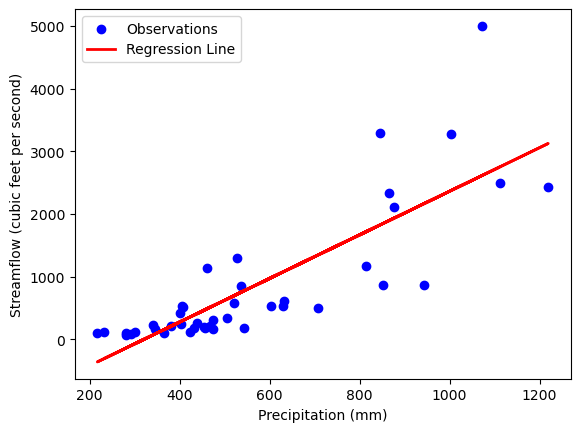

In [125]:
plt.scatter(x, y, color='blue', label='Observations')
plt.plot(x, y_est, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Streamflow (cubic feet per second)')
plt.title('')
plt.legend()
plt.show()

<span style="font-size: 24px;"> _Is it appropriate to use a linear model here?_ <span>

Let's look at the residuals: 

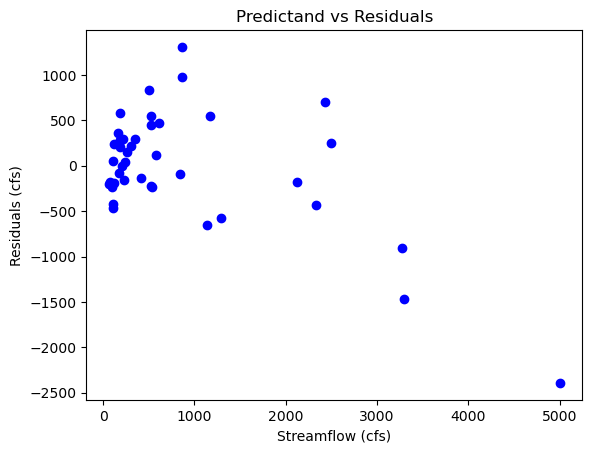

In [44]:
residuals = y_est - y

plt.scatter(y, residuals, color='blue')
plt.xlabel('Streamflow (cfs)')
plt.ylabel('Residuals (cfs)')
plt.title('Predictand vs Residuals')
plt.show()

The residuals seem to follow a structured pattern (largely dependent on the value of x). This tells us that the linear model may not be appropriate for this application.

However, despite this, the linear model provides reasonable accuracy (explaining about 67% of the variability in observations):

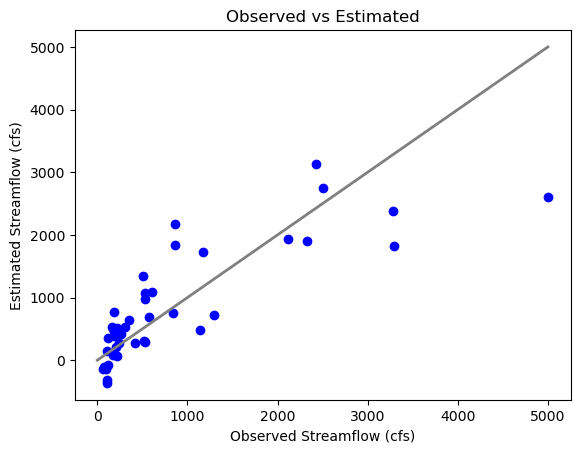

In [34]:
plt.scatter(y, y_est, color='blue')
plt.plot(np.arange(1,5000), np.arange(1,5000), color='gray', linewidth=2)

plt.xlabel('Observed Streamflow (cfs)')
plt.ylabel('Estimated Streamflow (cfs)')
plt.title('Observed vs Estimated')
plt.show()

Since the data spans several orders of magnitude, let's visualize this in log-log scale:

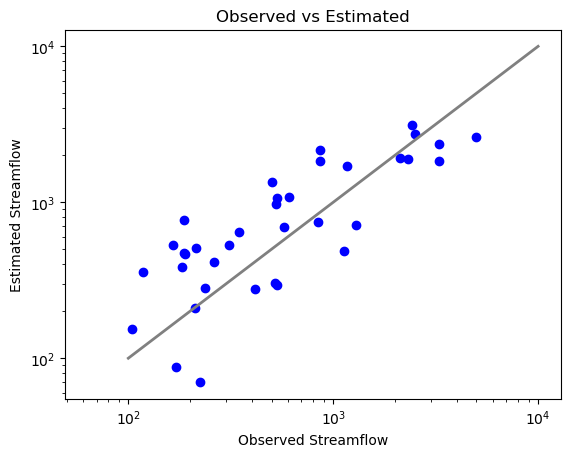

In [40]:
plt.scatter(y, y_est, color='blue')
plt.plot(np.array([100,1000,10000]), np.array([100,1000,10000]), color='gray', linewidth=2)

# Set both axes to log scale
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Observed Streamflow')
plt.ylabel('Estimated Streamflow')
plt.title('Observed vs Estimated')
plt.show()

### Assumptions of linear regression:

- Linearity
- Independence
- Homoscedasticity
- Normality of residuals

(array([ 1.,  0.,  1.,  0.,  3., 10.,  9., 13.,  3.,  2.]),
 array([-2391.872, -2021.78 , -1651.687, -1281.595,  -911.503,  -541.411,
         -171.318,   198.774,   568.866,   938.958,  1309.051]),
 <BarContainer object of 10 artists>)

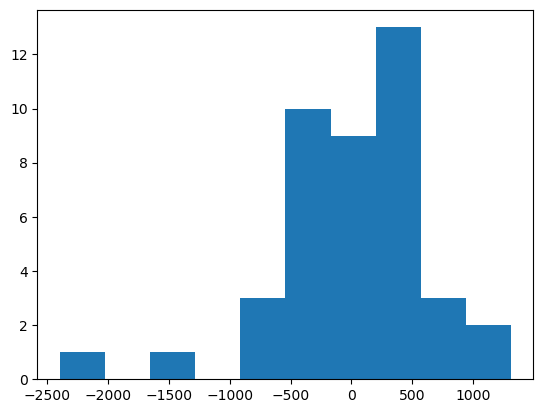

In [41]:
## Normality of residuals
plt.hist(residuals)

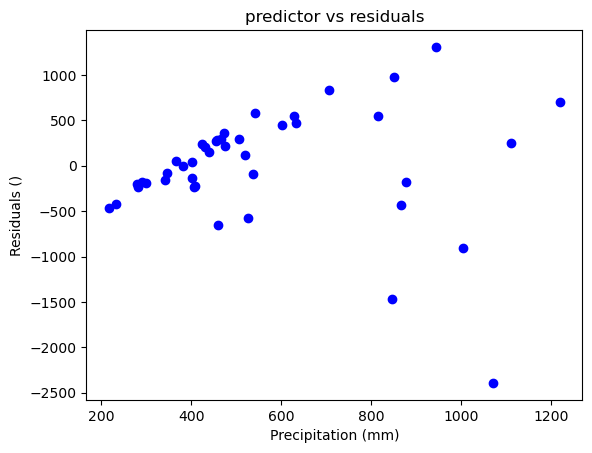

In [42]:
## Homoscedasticity
plt.scatter(x, residuals, color='blue')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Residuals ()')
plt.title('predictor vs residuals')
plt.show()

## <center> Multiple Linear Regression </center>

The formula of a multiple linear regression model is: 
<span style="font-size: 24px;"> $ y = \beta_{0} + \sum_{j=1}^{m} \beta_{m} * x_{m} + \epsilon $ <span>

Where **m** is the number of features (predictors).

Let's revisit the dataset in the previous section. This time, we want to estimate streamflow from both precipitation and evapotranspiration:

In [128]:
y = df['S'].values.reshape(-1,1)
X = df[['P', 'E']].values

# Fit the model to the data (estimate parameters)
model = LinearRegression()
model.fit(X, y)

# Get the model estimated y
y_est_2 = model.predict(X)

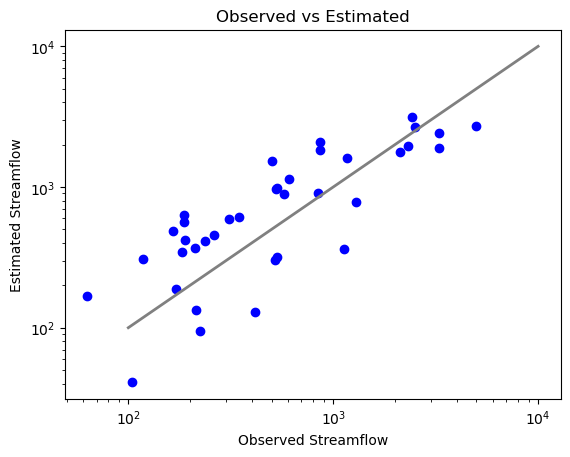

In [129]:
plt.scatter(y, y_est_2, color='blue')
plt.plot(np.array([100,1000,10000]), np.array([100,1000,10000]), color='gray', linewidth=2)

# Set both axes to log scale
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Observed Streamflow')
plt.ylabel('Estimated Streamflow')
plt.title('Observed vs Estimated')
plt.show()

Let's compare the performance of the two models:

In [130]:
from sklearn.metrics import mean_squared_error, r2_score

### Let's evaluate the model:
mse = mean_squared_error(y, y_est)
r2 = r2_score(y, y_est)

print("Model 1")
print("Mean Squared Error:", np.round(mse, 2))
print("R-squared:", np.round(r2, 2))

print("----------------------------")

mse = mean_squared_error(y, y_est_2)
r2 = r2_score(y, y_est_2)

print("Model 2")
print("Mean Squared Error:", np.round(mse, 2))
print("R-squared:", np.round(r2, 2))

Model 1
Mean Squared Error: 388724.46
R-squared: 0.67
----------------------------
Model 2
Mean Squared Error: 373911.82
R-squared: 0.68


## <center> In-class Excercise </center>

Let's build a multiple linear regression model to estimate and predict streamflow using the "monthly_meteo_streamflow.csv" dataset

In [60]:
df = pd.read_csv('monthly_meteo_streamflow.csv')
df

,year,month,P,E,Tmean,Tmax,Tmin,Tdmean,vpdmax,vpdmin,S
0,1980,1,336.051600,19.272449,4.622550,8.745250,0.500800,-3.860550,6.400100,1.616000,423.612903
1,1980,2,418.161899,29.872766,5.514000,10.940600,0.088350,-5.081450,8.782650,1.898050,1685.965517
2,1980,3,154.332850,58.054099,4.030850,9.760900,-1.698250,-5.708050,8.087550,1.454300,609.161290
3,1980,4,19.936850,115.392255,8.772800,16.275450,1.271500,-5.285750,15.164100,2.414800,236.533333
4,1980,5,26.090900,116.888575,8.761500,15.231000,2.293150,0.081100,11.650450,1.135850,174.290323
...,...,...,...,...,...,...,...,...,...,...,...
499,2021,8,3.187385,152.323303,21.948775,27.692679,16.205010,4.492985,29.707269,9.432910,0.425161
500,2021,9,0.694000,112.327974,19.826580,25.139330,14.513980,1.894015,26.081899,7.880130,0.536333
501,2021,10,34.804679,80.789519,10.903875,17.622540,4.185345,-2.362750,13.043130,3.043920,1.584839
502,2021,11,0.000000,50.394858,11.795860,16.642759,6.949110,-6.681535,15.416895,5.452640,2.848667


In [64]:
X = df.iloc[:, 2:-1].values
y= df.iloc[:, -1].values

In [70]:
from sklearn.feature_selection import SelectKBest, f_regression
test = SelectKBest(score_func=f_regression, k=4)
fit = test.fit(X, y)

# Summarize scores
scores = pd.DataFrame(fit.scores_, index= df.columns[2:-1], columns= ['score'])
print('The scores for the features are = ', scores.sort_values(by= 'score', ascending= False))

The scores for the features are =               score
P       604.631855
vpdmax   62.162025
Tmax     60.565141
vpdmin   56.113101
Tmean    53.176189
E        45.211076
Tmin     42.819218
Tdmean    3.031612


#### Split the data into training and testing datasets:

In [105]:
from sklearn.model_selection import train_test_split

#### Build a model using a single predictor (simple linear regression)

In [112]:
## Extract x and y
y = df['S'].values.reshape(-1,1)
X = df[['P']].values

## split the data into training and testing
X_train_1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the data (estimate parameters)
model_1 = LinearRegression()
model_1.fit(X_train_1, y_train)

# Get the model estimated y
y_1 = model_1.predict(X_test)

#### Build a model using four predictor (identified from feature selection)

In [119]:
## Extract x and y
y = df['S'].values.reshape(-1,1)
X = df[['P', 'vpdmax', 'E', 'Tdmean']].values

## split the data into training and testing
X_train_2, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the data (estimate parameters)
model_2 = LinearRegression()
model_2.fit(X_train_2, y_train)

# Get the model estimated y
y_2 = model_2.predict(X_test)

#### Build a model using all predictor

In [114]:
## Extract x and y
y = df['S'].values.reshape(-1,1)
X = df.iloc[:,2 : -1].values

## split the data into training and testing
X_train_3, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the data (estimate parameters)
model_3 = LinearRegression()
model_3.fit(X_train_3, y_train)

# Get the model estimated y
y_3 = model_3.predict(X_test)

In [120]:
### Let's evaluate the model:
mse = mean_squared_error(y_test, y_1)
r2 = r2_score(y_test, y_1)

print("Model 1")
print("Mean Squared Error:", np.round(mse, 2))
print("R-squared:", np.round(r2, 2))

print("----------------------------")

mse = mean_squared_error(y_test, y_2)
r2 = r2_score(y_test, y_2)

print("Model 2")
print("Mean Squared Error:", np.round(mse, 2))
print("R-squared:", np.round(r2, 2))

print("----------------------------")

mse = mean_squared_error(y_test, y_3)
r2 = r2_score(y_test, y_3)

print("Model 3")
print("Mean Squared Error:", np.round(mse, 2))
print("R-squared:", np.round(r2, 2))

Model 1
Mean Squared Error: 13203.6
R-squared: 0.07
----------------------------
Model 2
Mean Squared Error: 12952.24
R-squared: 0.09
----------------------------
Model 3
Mean Squared Error: 12738.2
R-squared: 0.1


#### Calculate AIC and BIC for the models:

In [121]:
results = [model_1.predict(X_train_1), model_2.predict(X_train_2), model_3.predict(X_train_3)]

for i in range(len(results)):

    # Calculate residuals and SSE
    residuals = y_train - results[i]
    SSE = np.sum(residuals ** 2)
    n = len(y_train)  # Number of observations
    k = X_train.shape[1] + 1  # Number of parameters (features + intercept)

    # Calculate AIC and BIC
    AIC = n * np.log(SSE / n) + 2 * k
    BIC = n * np.log(SSE / n) + k * np.log(n)

    # Print
    print('AIC = ', AIC)
    print('BIC = ', BIC)
    print('------------------------')

AIC =  4031.339306202066
BIC =  4067.329735259586
------------------------
AIC =  4006.1714451575813
BIC =  4042.1618742151013
------------------------
AIC =  3995.062534849293
BIC =  4031.052963906813
------------------------
